In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
housing_price_dataset = [(152, 213.45),
 (142, 149.89),
 (64, 122.17),
 (156, 203.97),
 (121, 182.69),
 (70, 138.4),
 (152, 182.51),
 (171, 199.9),
 (124, 170.24),
 (137, 162.86),
 (166, 219.76),
 (149, 196.16),
 (153, 268.84),
 (180, 204.37),
 (199, 229.45),
 (102, 162.6),
 (51, 122.82),
 (137, 244.18),
 (87, 177.57),
 (179, 249.59),
 (70, 127.33),
 (107, 179.42),
 (71, 105.74),
 (138, 180.09),
 (98, 110.94),
 (108, 152.28),
 (64, 138.07),
 (100, 144.76),
 (157, 187.65),
 (104, 145.0),
 (113, 181.1),
 (180, 223.61),
 (100, 171.25),
 (184, 201.22),
 (70, 98.24),
 (122, 159.33),
 (67, 84.25),
 (181, 304.59),
 (138, 160.59),
 (109, 181.87),
 (63, 96.35),
 (58, 95.16),
 (139, 196.53),
 (102, 115.54),
 (179, 212.43),
 (133, 179.34),
 (141, 169.85),
 (160, 189.44),
 (57, 134.17),
 (84, 159.12),
 (130, 168.95),
 (99, 146.9),
 (153, 233.93),
 (181, 195.34),
 (51, 109.45),
 (183, 282.36),
 (103, 202.12),
 (155, 156.5),
 (53, 83.93),
 (103, 157.22),
 (195, 211.95),
 (93, 126.29),
 (63, 109.57),
 (144, 229.03),
 (97, 145.86),
 (64, 119.42),
 (89, 151.81),
 (131, 194.59),
 (160, 210.7),
 (102, 122.07),
 (73, 142.74),
 (173, 233.79),
 (90, 112.58),
 (64, 96.94),
 (94, 166.19),
 (114, 179.14),
 (138, 169.99),
 (120, 163.25),
 (58, 104.41),
 (137, 202.43),
 (178, 259.22),
 (185, 236.64),
 (112, 191.23),
 (188, 259.83),
 (130, 185.14),
 (185, 198.91),
 (82, 106.31),
 (172, 240.53),
 (54, 61.24),
 (90, 142.97),
 (77, 152.01),
 (184, 237.81),
 (121, 155.97),
 (61, 89.83),
 (82, 152.4),
 (97, 158.79),
 (111, 153.86),
 (86, 162.63),
 (148, 219.35),
 (153, 247.71)]

In [3]:
# Getting all x and y values (first and second element of each tuple).
x_train = [pair[0] for pair in housing_price_dataset]
y_train = [pair[1] for pair in housing_price_dataset]

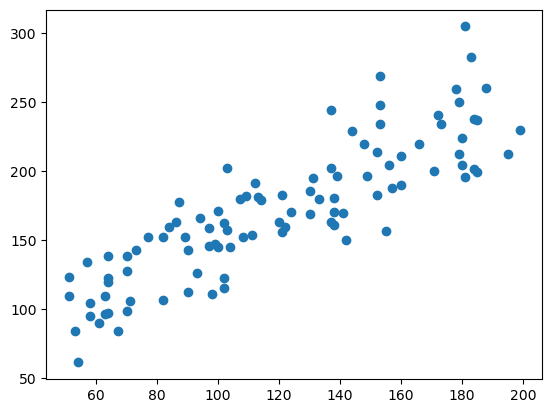

In [4]:
plt.scatter(x_train, y_train)
plt.show()

# Cost Function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{J}$$
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{f}$$

## Compute_Cost

In [5]:
# Function to calculate the cost
def compute_cost(x, y, w, b):
    m = len(x)
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    cost = (1 / (2 / m)) * cost
    return cost

## Compute Gradient
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{w}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{b}\\
\end{align}
$$
where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{f}$$

In [6]:
def compute_gradient(x, y, w, b):
    m = len(x)
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b
        
        dj_dw += (f_wb - y[i]) * x[i] 
        dj_db += f_wb - y[i] 
        
    dj_dw /= m 
    dj_db /= m 
        
    return dj_dw, dj_db

## Implement Gradient Descent

$$
\text{repeat until convergence: } \{ \\
\qquad w = w - \alpha \frac{\partial J(w,b)}{\partial w} \\
\qquad b = b - \alpha \frac{\partial J(w,b)}{\partial b} \\
\}
$$

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w, b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history # return w and J,w history for graphing

## Training

In [9]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 1500
tmp_alpha = 0.0000003

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.57e+08  dj_dw: -2.231e+04, dj_db: -1.713e+02   w:  6.692e-03, b: 5.13855e-05
Iteration  150: Cost 4.00e+07  dj_dw: -1.077e+04, dj_db: -8.555e+01   w:  7.179e-01, b: 5.58529e-03
Iteration  300: Cost 1.28e+07  dj_dw: -5.198e+03, dj_db: -4.417e+01   w:  1.061e+00, b: 8.38580e-03
Iteration  450: Cost 6.41e+06  dj_dw: -2.509e+03, dj_db: -2.419e+01   w:  1.227e+00, b: 9.86686e-03
Iteration  600: Cost 4.93e+06  dj_dw: -1.211e+03, dj_db: -1.455e+01   w:  1.307e+00, b: 1.07110e-02
Iteration  750: Cost 4.59e+06  dj_dw: -5.846e+02, dj_db: -9.895e+00   w:  1.346e+00, b: 1.12477e-02
Iteration  900: Cost 4.51e+06  dj_dw: -2.822e+02, dj_db: -7.648e+00   w:  1.364e+00, b: 1.16360e-02
Iteration 1050: Cost 4.49e+06  dj_dw: -1.362e+02, dj_db: -6.563e+00   w:  1.373e+00, b: 1.19527e-02
Iteration 1200: Cost 4.48e+06  dj_dw: -6.572e+01, dj_db: -6.040e+00   w:  1.378e+00, b: 1.22347e-02
Iteration 1350: Cost 4.48e+06  dj_dw: -3.170e+01, dj_db: -5.787e+00   w:  1.380e+00, b: 1.25001e-02


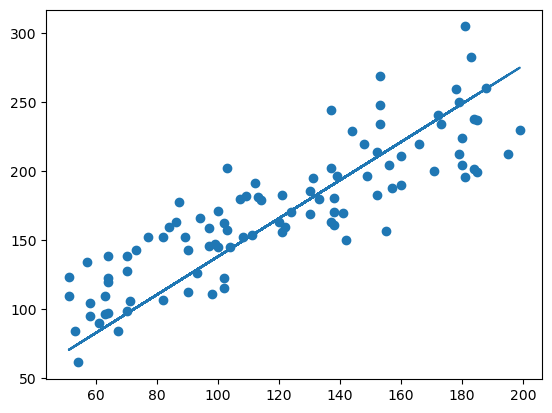

In [10]:
plt.scatter(x_train, y_train)
plt.plot(x_train, [(w_final * x + b_final) for x in x_train] )
plt.show()

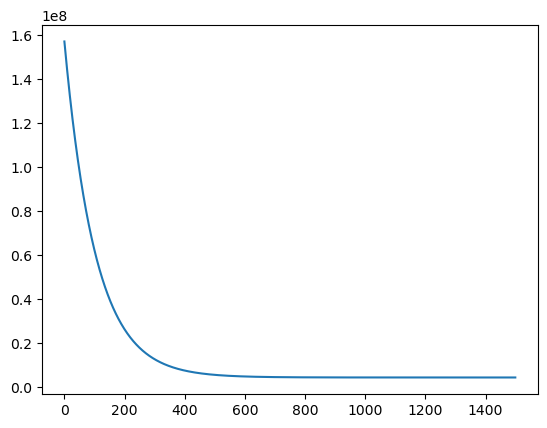

In [11]:
plt.plot(J_hist)
plt.show()

# Prediction Price

In [12]:
def predict(x, w, b):
  f_wb = 0
  f_wb = w * x + b
  return f_wb

In [13]:
user_input_area = int(input("Enter the area in square metes: "))
predicted_price = predict(user_input_area, w_final, b_final)
print(f"Predicted price for an area of {user_input_area} square meters: ${predicted_price*1000:.2f}")

Enter the area in square metes:  800


Predicted price for an area of 800 square meters: $1104522.21
